## Logisitic Regression Analysis on Company's Attrition Problem

This project highlights the modelling, evaluating of logistic regression on attrition problem happening in a reputed company. The project is divided into below categories for better understanding purposes.<br>

1. Problem Statement
2. Data preprocessing
3. Building the model
4. Performance evaluation
5. Conclusions and Recommendations

## 1. Problem Statement and Objectives

### 1.1 Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

### 1.2 Goals of current case study

Since we are one of the star analysts at the firm, this project has been given to us by the company HR.

**Goal of the case study is to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay**.

1. To perform Univariate and Multivariate analysis for getting the insights about the data
2. To apply Logisitic regression model to the attrition problem and finding who is causing the attrition to the company

## 2. Data Preprocessing

### 2.1 Dataset gathering and description

The data set is called "Attrition_data.csv" file. This file has 24 columns also called as features and has 4410 rows also called as records. The features names are as follows: 
	
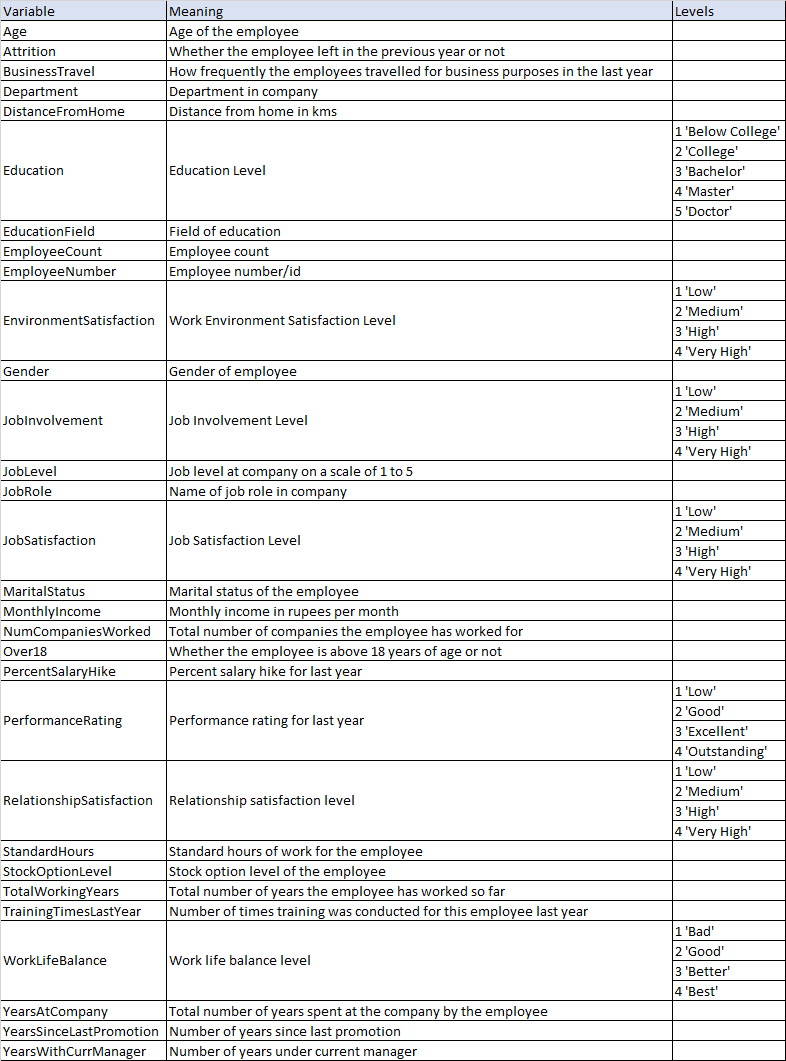




The dataset and data dictionary sources can be acquried from below link https://drive.google.com/drive/folders/1rgvuvFC7IxwJVU18_jfakGuUpIWfxEaH

### 2.2 Loading dataset and checking general properties

In [1]:
#Importing required libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Load the csv file using read_csv function
data = pd.read_csv("Attrition_dataset.csv")
#checking the dataframe using head() function
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
#check the columns of data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
#check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Observations:<br>

#### Numerical Features: <br>
> 1. Age
> 2. DistanceFromHome
> 3. Education
> 4. Employee Count 
> 5. EmployeeID
> 6. JobLevel
> 7. MonthlyIncome
> 8. NumCompaniesWorked
> 9. PercentSalaryHiked
> 10. TotalWorkingHours
> 11. TrainingTimesLastYear
> 12. YearsAtCompany
> 13. YearsSinceLastPromotion
> 14. YearsWithCurrManager

#### Categorical Features:<br>
> 1. Attrition
> 2. BusinessLevel
> 3. Department
> 4. Education Field
> 5. Gender
> 6. JobRole
> 7. MaritalStatus
> 8. Over18


1. Target value(attrition) is a object and we need to convert it to numerical
2. Seems like missing values are there in dataset

In [5]:
#Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Observation:<br>
There are 19 missing values in NumCompaniesWorked and 9 missing values in TotalWorkingHours

In [6]:
#checking the datatype of each column
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

### 2.3 Exploratory Data Analysis

In [7]:
#have a look on descriptive statistics of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


#### Observations:<br>
1. EmployeeID, EmployeeCount, Over18 and StandardHours columns has nothing to do with attrition prediction
2. MonthlyIncome of an employee could be the one of reasons behind the employee attrition rate
3. Age column seems normally distributed

In [8]:
#Lets divide the above data features into two subsets
#categorical and numerical. For this we will create function

def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [9]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Attrition"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

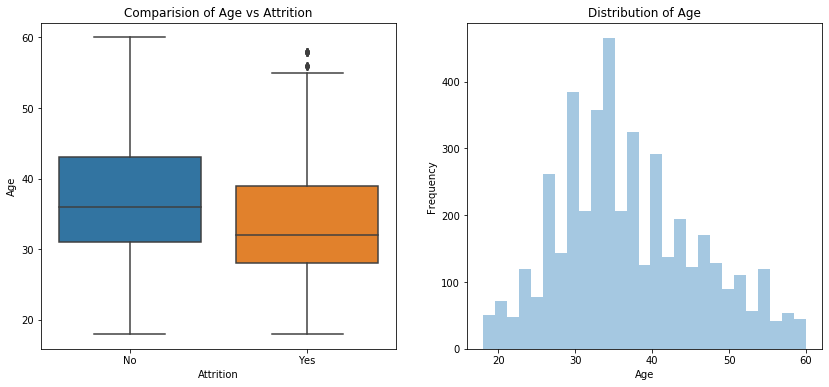

In [10]:
#checking how age is distributed
NumericalVariables_targetPlots(data,segment_by="Age")

#### Observations:<br>
1. We observe from the above plot that minimum age is 18 and maximum age reaches to 60
2. From the box plot, it seems like majority of employees who left the company are below 40 years. This can be due to younger people have got better oppurtunities
3. People who did not left the company/stayed in company are above 40 years. This might be due to that people who are in middle and older aged people thought that leaving the company would not effect their career and they must have thought about their familiy living.

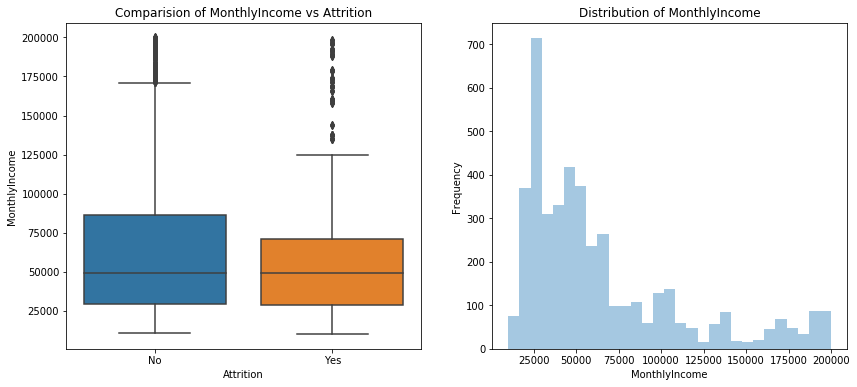

In [11]:
NumericalVariables_targetPlots(data,segment_by="MonthlyIncome")

#### Observation:<br>
1. Employees who are getting less income are tend to leave the company than employees who are getting paid with high salary
2. From box plot, the monthlyincome has more outliers. This could be one of reasons behind the employee high attrition rate.

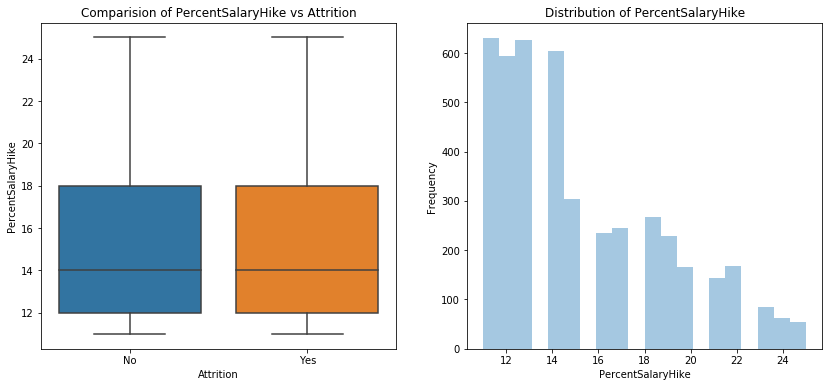

In [12]:
NumericalVariables_targetPlots(data,segment_by="PercentSalaryHike")

#### Observations:<br>

People who are receiving less salary hike are more when compared to people who are receiving high salary hike.

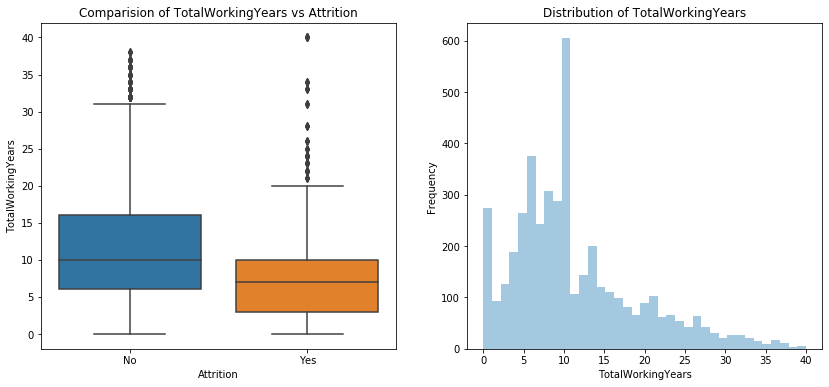

In [13]:
NumericalVariables_targetPlots(data,segment_by="TotalWorkingYears")

#### Observations:<br>
1. People who have total working experience of less than 10 years are more to leave the company than people who have more than 10 years of working experience. 
2. Since highly experienced people have responsibilites over them, they tend to give up on leaving the company.

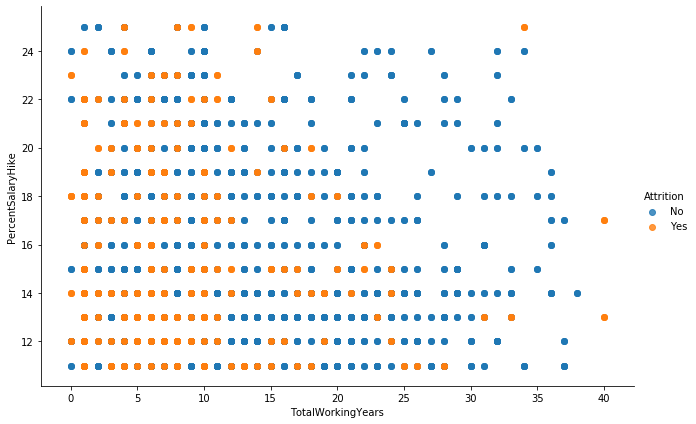

In [15]:
#Checking the percentsalaryhike vs total working years on basis of attrition

sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=data,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

#### Observations:<br>
1. There is no linear relationship between working years and salary hike of employees with less working years.
2. Attrition is not seen amomg the employee's having more than 20 years of experience irrespective of salary hike they have received.
3. Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike.

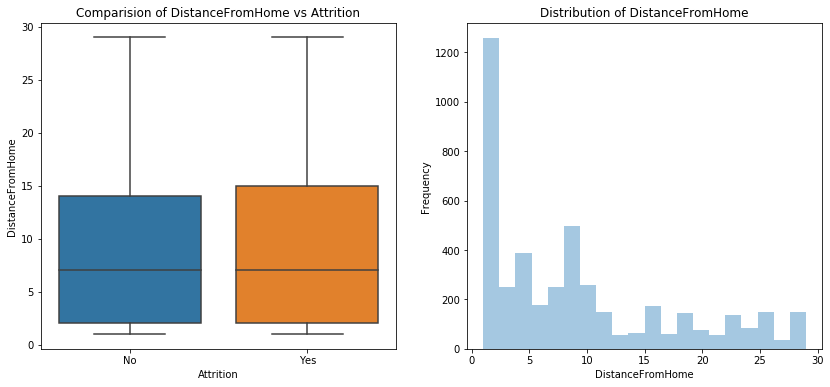

In [16]:
NumericalVariables_targetPlots(data,segment_by="DistanceFromHome")

#### Observations:<br>
From the above graphs, it can be inferred that people living in locations nearby to office are more and they are the one who stayed at the company. As distance increases, the attrition rate also increases.

In [17]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(data.JobLevel,data.Attrition)

Attrition,No,Yes
JobLevel,,
1,1377,252
2,1317,285
3,558,96
4,267,51
5,180,27


In [18]:
#calculating the percentage of people having different job involvement rate
round(data.JobLevel.value_counts()/data.shape[0] * 100,2)

1    36.94
2    36.33
3    14.83
4     7.21
5     4.69
Name: JobLevel, dtype: float64

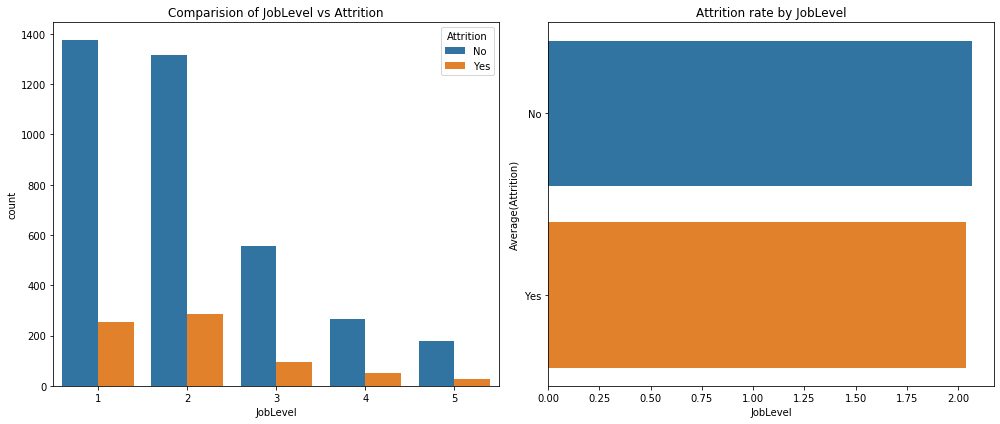

In [19]:
CategoricalVariables_targetPlots(data, "JobLevel")

#### Observations:<br>
1. From the above plot, we can observe that employees with joblevel 1 and 2 are the one who left the company

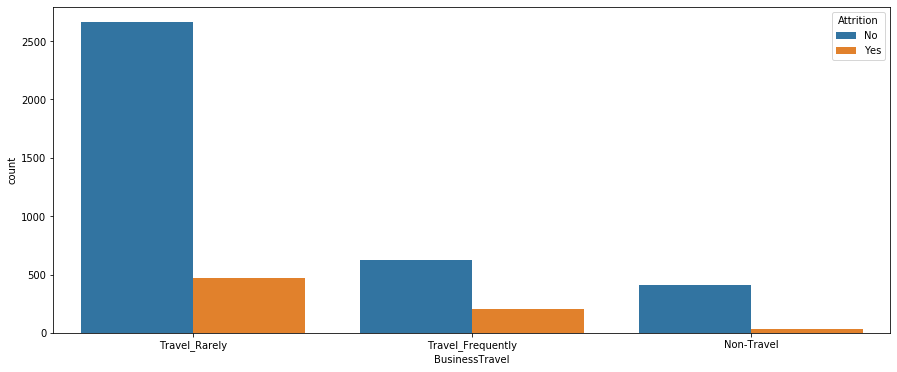

In [26]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="BusinessTravel", hue="Attrition", data=data)

#### Observation:<br>
There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

In [27]:
#Check the how many employees are there per department
data.Department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

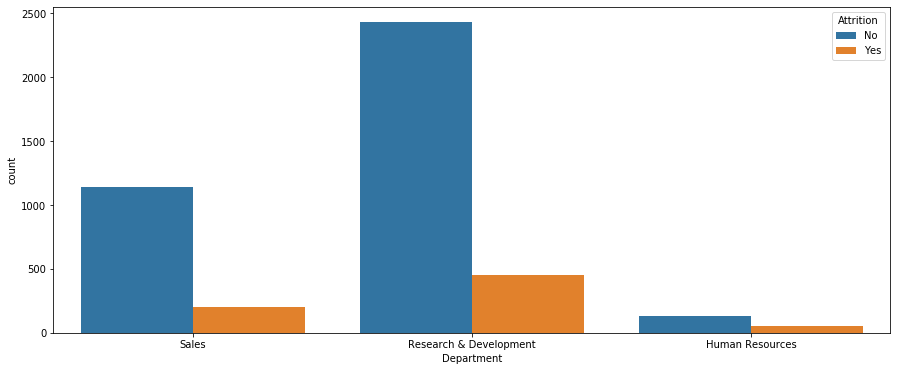

In [38]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="Department", hue="Attrition", data=data)

#### Observations:<br>
On comparing departmentwise,we can conclude that attrition levels are not appreciable in R & D where 67 % have recorded no attrition.

In [39]:
#Check the how many employees are there per gender
data.Gender.value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

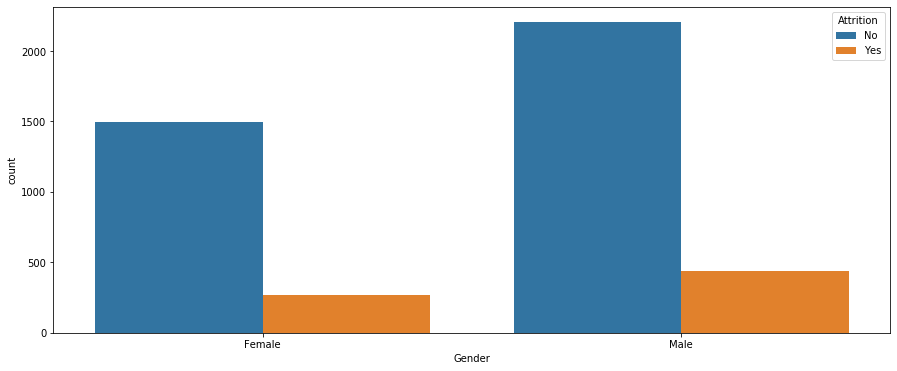

In [37]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="Gender", hue="Attrition", data=data)

#### Observations:<br>
Male employees tend to leave company when compared to female.

In [42]:
#Check the how many employees are there per marital status
data.MaritalStatus.value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

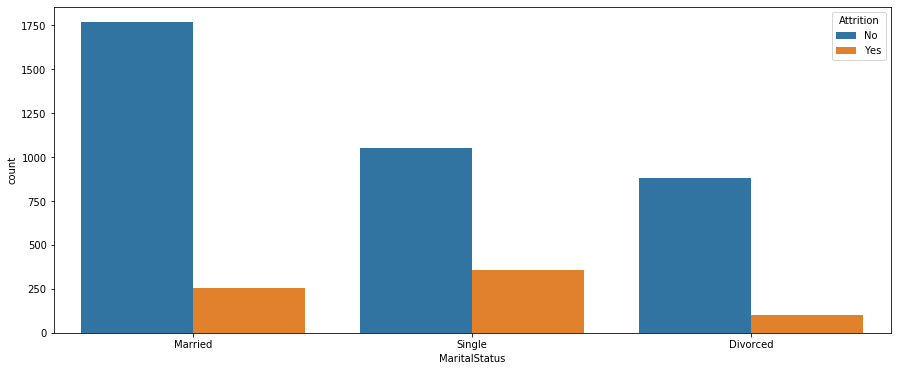

In [43]:
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="MaritalStatus", hue="Attrition", data=data)

#### Observation:<br>
1. Employees who are single tend to leave the company more when compared to who are married and divorced.
2. It sees that Gender is not a strong indicator of attrition

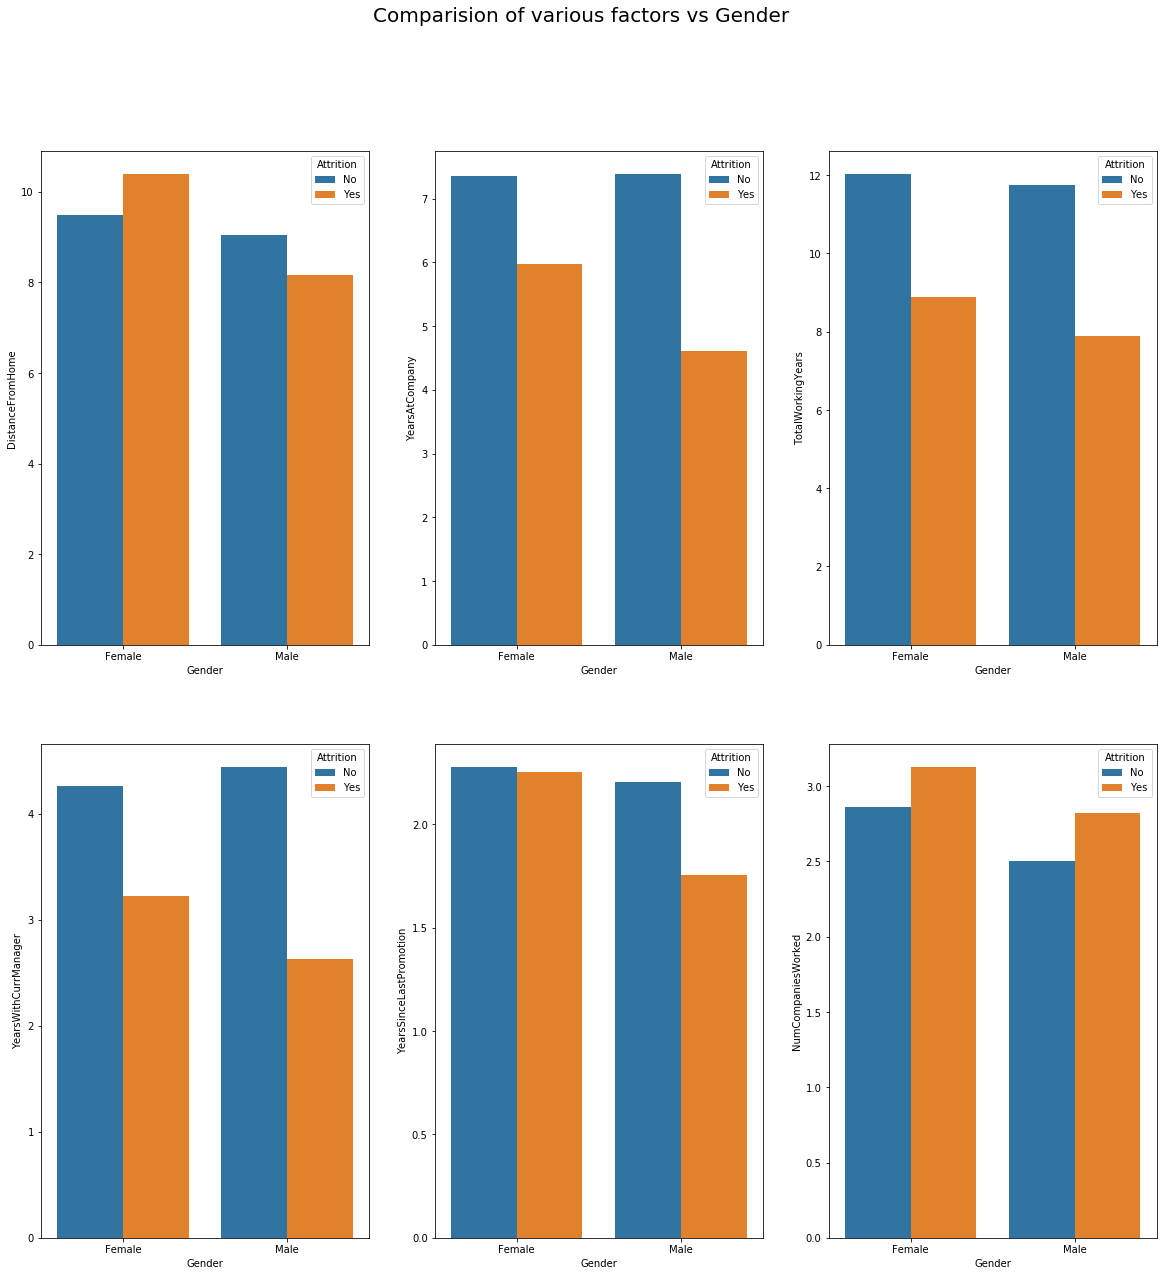

In [46]:
#Comparision of various factors with gender
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(data['Gender'],data['DistanceFromHome'],hue = data['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(data['Gender'],data['YearsAtCompany'],hue = data['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(data['Gender'],data['TotalWorkingYears'],hue = data['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(data['Gender'],data['YearsWithCurrManager'],hue = data['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(data['Gender'],data['YearsSinceLastPromotion'],hue = data['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(data['Gender'],data['NumCompaniesWorked'],hue = data['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

#### Observations:<br>
1. Distance from home matters to women employees more than men.
2. Female employes are spending more years in one company compare to their counterpart.
3. Female employes are more inclined to switch than male employees

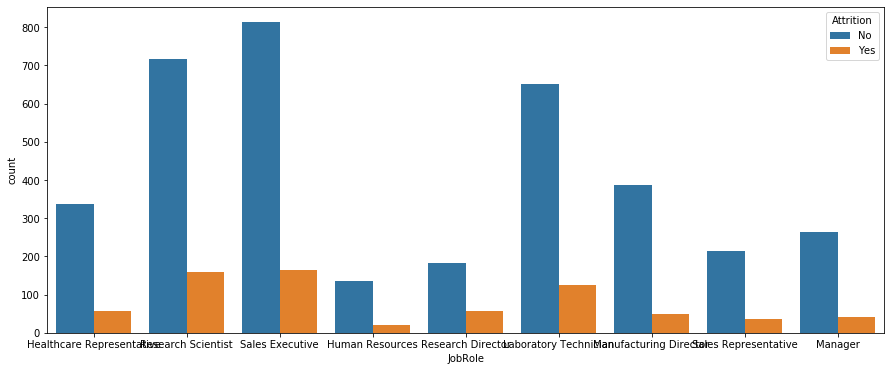

In [53]:
#Comparision of jobrole by attrition
fig = plt.figure(1, figsize=(15,6))
sns.countplot(x="JobRole", hue="Attrition", data=data)

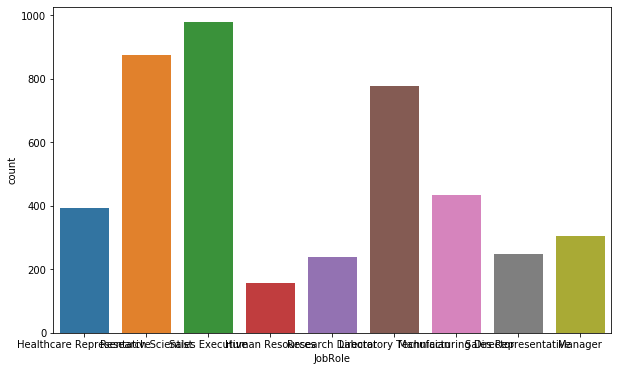

In [52]:
#Comparision of jobrole by attrition
fig = plt.figure(1, figsize=(10,6))
sns.countplot(x="JobRole",data=data)

#### Observation:<br>
1. Jobs held by the employee is maximum in Sales Executive, then Research Scientist , then Laboratory Technician
2. People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources

#### Inferences:<br>
Variables that wont contribute to Attrition are:<br>
> 1. EmployeeID
> 2. EmployeeCount
> 3. Over18
> 4. StandardHours
> 5. Gender
> 6. JobLevel

### 2.4 Feature Engineering

1. Segregate the numerical and Categorical variables
2. Convert Categorical variables to numerical variables

In [54]:
#COPying the dataframe without effecting original dataframe
data2 = data.copy()

In [56]:
#Removing unuseful features
data2.drop(['EmployeeCount','EmployeeID','StandardHours','Over18','Gender','JobLevel'], axis=1, inplace=True)

In [57]:
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [59]:
#capturing the data types of variables and storing in dictionary
dict(data2.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'JobRole': dtype('O'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'NumCompaniesWorked': dtype('float64'),
 'PercentSalaryHike': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('float64'),
 'TrainingTimesLastYear': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [60]:
#segregating the entire dataframe based on categorical and numerical datatypes
numeric_variable_names  = [key for key in dict(data2.dtypes) if dict(data2.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(data2.dtypes) if dict(data2.dtypes)[key] in ["object"]]

In [61]:
#Storing the above variables in two new datasets
data2_num = data2[numeric_variable_names]

In [62]:
data2_cat = data2[categorical_variable_names]

In [63]:
#check if numerical dataset has any missing values
data2_num.isnull().sum()

Age                         0
DistanceFromHome            0
Education                   0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [68]:
#treating missing values by filling them with mean value
data2_num['TotalWorkingYears']=data2_num['TotalWorkingYears'].fillna(value=data2_num['TotalWorkingYears'].mean())

In [69]:
data2_num['NumCompaniesWorked'] = data2_num['NumCompaniesWorked'].fillna(value=data2_num['NumCompaniesWorked'].mean())

In [71]:
data2_num.isnull().sum()

Age                        0
DistanceFromHome           0
Education                  0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [72]:
#converting the categorical variables to numerical values
#this can be done by importing label encoder from sklearn package
from sklearn import preprocessing

In [73]:
label_encoder = preprocessing.LabelEncoder()
data2_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'JobRole', 'MaritalStatus'],
      dtype='object')

In [74]:
data2_cat['Attrition'] = label_encoder.fit_transform(data2_cat['Attrition'])
data2_cat['BusinessTravel'] = label_encoder.fit_transform(data2_cat['BusinessTravel'])
data2_cat['Department'] = label_encoder.fit_transform(data2_cat['Department'])
data2_cat['EducationField'] = label_encoder.fit_transform(data2_cat['EducationField'])
data2_cat['JobRole'] = label_encoder.fit_transform(data2_cat['JobRole'])
data2_cat['MaritalStatus'] = label_encoder.fit_transform(data2_cat['MaritalStatus'])

In [76]:
data2_cat.head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,0,2,2,1,0,1
1,1,1,1,1,6,2
2,0,1,1,4,7,1
3,0,0,1,1,1,1
4,0,2,1,3,7,2


In [77]:
data_final = pd.concat([data2_num, data2_cat], axis=1)

In [78]:
data_final.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,51,6,2,131160,1.0,11,0,1.0,6,1,0,0,0,2,2,1,0,1
1,31,10,1,41890,0.0,23,1,6.0,3,5,1,4,1,1,1,1,6,2
2,32,17,4,193280,1.0,15,3,5.0,2,5,0,3,0,1,1,4,7,1
3,38,2,5,83210,3.0,11,3,13.0,5,8,7,5,0,0,1,1,1,1
4,32,10,1,23420,4.0,12,2,9.0,2,6,0,4,0,2,1,3,7,2


In [79]:
#Lets have final look at features without attrition for ease of understanding
features = list(data_final.columns.difference(["Attrition"]))

In [80]:
features

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## 3. Building Model

In [81]:
#seperating the variables X and y
X = data_final[features]
y = data_final[['Attrition']]

In [82]:
#Checking the shapes
X.shape

(4410, 17)

In [83]:
y.shape

(4410, 1)

In [84]:
#Splitting the variables by 70:30 ratio
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

#Creating model
model_lm = LogisticRegression()

#fit and train the model with training data
model_lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. Evaluation

In [85]:
#test the above model with test data
y_pred = model_lm.predict(X_test)

In [86]:
#printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1125
           1       0.00      0.00      0.00       198

    accuracy                           0.85      1323
   macro avg       0.43      0.50      0.46      1323
weighted avg       0.72      0.85      0.78      1323



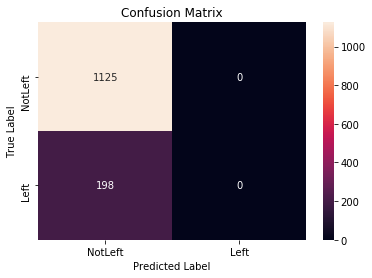

In [88]:
#printing the classification report through heatmap
cm = confusion_matrix(y_test, y_pred)

class_label = ["NotLeft", "Left"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusions and Recommendations

1. Company XYZ should focus on single people and this may or maynot include freshers
2. Company XYZ should focus on employees who has 1-2 years of experience and working with current manager from 1-2 years by giving expected salaries
3. People who travel rarely should increase the travel percentage and people who travel frequently should decrease the travelling by giving proper compensation
4. People from HR/Sales department should be paid properly
5. People having high performance rating should be rewarded at most of times